In [1]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as p
from sklearn import datasets
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [2]:
#Fetching Clean Data 
df= pd.read_csv('Clean_data.csv')
desc_features = ['id','teacher_id','teacher_prefix','school_state','project_submitted_datetime','project_grade_category','project_subject_categories','project_subject_subcategories','project_title','project_resource_summary','teacher_number_of_previously_posted_projects','price','quantity','essay']
Y= df['project_is_approved']
df.drop(columns=["project_is_approved"],axis=1,inplace=True)
df.head()

,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_resource_summary,teacher_number_of_previously_posted_projects,price,quantity,essay
0,p253737,c90749f5d961ff158d4b4d1e7dc665fc,mrs,in,12/5/2016 13:43,grades_prek_2,literacy_language,esl_literacy,Educational Support for English Learners at Home,My students need opportunities to practice beg...,0.000000,0.015397,0.023681,students english learners working english seco...
1,p258326,897464ce9ddc600bced1151f324dd63a,mr,fl,10/25/2016 9:22,grades_6_8,history_civics_health_sports,civics_government_teamsports,Wanted: Projector for Hungry Learners,My students need a projector to help with view...,0.016355,0.029839,0.000000,students arrive school eager learn polite gene...
2,p182444,3465aaf82da834c0582ebd0ef8040ca0,ms,az,8/31/2016 12:03,grades_6_8,health_sports,health_wellness_teamsports,Soccer Equipment for AWESOME Middle School Stu...,"My students need shine guards, athletic socks,...",0.002336,0.051628,0.022605,true champions not always ones win guts mia ha...
3,p246581,f3cb9bffbba169bef1a77b243e620b60,mrs,ky,10/6/2016 21:16,grades_prek_2,literacy_language_math_science,literacy_mathematics,Techie Kindergarteners,My students need to engage in Reading and Math...,0.009346,0.023228,0.003229,work unique school filled esl english second l...
4,p104768,be1f7507a41f8479dc06f047086a39ec,mrs,tx,7/11/2016 1:10,grades_prek_2,math_science,mathematics,Interactive Math Tools,My students need hands on practice in mathemat...,0.002336,0.006733,0.003229,second grade classroom next year made around 2...


#### Using OrdinalEncoder utility class on descriptive features

In [3]:
#Transforming features to apply to a model
#z=pd.get_dummies(df)
X_train_new=OrdinalEncoder().fit_transform(df)
#converting numpy array to dataframe
Training_desc=pd.DataFrame(X_train_new,columns=desc_features)
Training_desc

,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_resource_summary,teacher_number_of_previously_posted_projects,price,quantity,essay
0,48760.0,30298.0,2.0,15.0,13529.0,3.0,23.0,191.0,11645.0,36454.0,0.0,8421.0,22.0,31011.0
1,49632.0,20633.0,1.0,9.0,5809.0,1.0,18.0,75.0,43272.0,14190.0,7.0,15481.0,0.0,25400.0
2,35052.0,7876.0,3.0,3.0,37934.0,1.0,8.0,289.0,36844.0,39402.0,1.0,21911.0,21.0,46639.0
3,47383.0,36812.0,2.0,17.0,7058.0,3.0,27.0,305.0,39992.0,46437.0,4.0,12468.0,3.0,49094.0
4,20037.0,28655.0,2.0,43.0,28700.0,3.0,31.0,327.0,21100.0,29032.0,1.0,3402.0,3.0,22323.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,27729.0,20526.0,2.0,14.0,44763.0,3.0,27.0,305.0,47240.0,30940.0,8.0,22314.0,1.0,41959.0
49996,26486.0,33692.0,1.0,33.0,21680.0,0.0,8.0,277.0,1571.0,5490.0,6.0,11548.0,5.0,36602.0
49997,30533.0,7355.0,2.0,41.0,35553.0,0.0,8.0,277.0,1899.0,442.0,9.0,2561.0,13.0,47777.0
49998,18089.0,28635.0,2.0,6.0,2515.0,3.0,29.0,323.0,6460.0,5029.0,23.0,5337.0,5.0,19784.0


### feature selection using chi2

Feature  id : 23526.25668734894
Feature  teacher_id : 1918.8194462343388
Feature  teacher_prefix : 0.7719438945874665
Feature  school_state : 2.984776019657661
Feature  project_submitted_datetime : 382547.16353748733
Feature  project_grade_category : 3.052413616981203
Feature  project_subject_categories : 13.832869246621911
Feature  project_subject_subcategories : 1378.2548425916984
Feature  project_title : 32391.875222783987
Feature  project_resource_summary : 2591903.797126344
Feature  teacher_number_of_previously_posted_projects : 3022.9724643134355
Feature  price : 2806441.187934205
Feature  quantity : 4189.362105615697
Feature  essay : 2422.080301448328


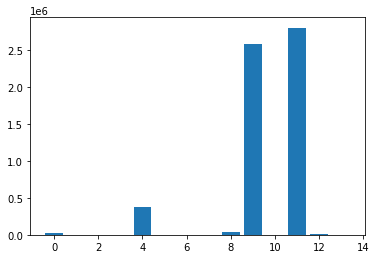

In [4]:
fs = SelectKBest(score_func=chi2, k=9)
fs.fit(Training_desc,Y)
scores=list(fs.scores_)

for x,y in zip(desc_features,fs.scores_):
    print("Feature ",x,":",y)

#plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

### Extra Tree Classifier for Feature Selection

[0.07623278 0.0757448  0.04557754 0.0728247  0.07731947 0.04230045
 0.06441605 0.07147473 0.07638068 0.08268852 0.06397105 0.0900366
 0.08475269 0.07627995]


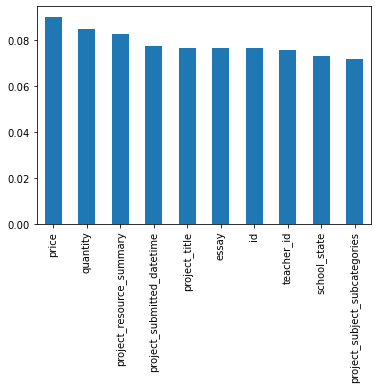

In [5]:
model = ExtraTreesClassifier()
model.fit(Training_desc,Y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=desc_features)
feat_importances.nlargest(10).plot(kind='bar')
plt.show()

### Split the data into training and testing (33% for testing)

In [6]:
X=Training_desc[desc_features]
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.33, stratify=Y, random_state = 71)
X_Train

,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_resource_summary,teacher_number_of_previously_posted_projects,price,quantity,essay
44978,40077.0,28212.0,2.0,35.0,32233.0,3.0,8.0,248.0,15184.0,31520.0,23.0,7352.0,1.0,42822.0
18495,40519.0,29551.0,2.0,35.0,14606.0,0.0,45.0,375.0,21843.0,40491.0,0.0,16714.0,6.0,21856.0
29029,36461.0,10163.0,3.0,4.0,24607.0,3.0,35.0,168.0,20765.0,27086.0,23.0,6774.0,23.0,7026.0
22648,7724.0,1911.0,2.0,14.0,2241.0,3.0,37.0,334.0,23690.0,47979.0,1.0,16266.0,3.0,23229.0
24450,18457.0,17507.0,2.0,33.0,9622.0,3.0,35.0,168.0,29335.0,31354.0,4.0,10274.0,0.0,22710.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34668,3077.0,20447.0,2.0,24.0,25202.0,0.0,0.0,29.0,38928.0,10986.0,1.0,21211.0,0.0,26100.0
8950,13098.0,19522.0,2.0,15.0,28238.0,3.0,27.0,317.0,21341.0,5861.0,0.0,11100.0,8.0,26745.0
8572,14734.0,31997.0,3.0,36.0,34404.0,0.0,29.0,312.0,38032.0,29031.0,0.0,22153.0,41.0,47305.0
15278,20221.0,3089.0,2.0,34.0,34183.0,0.0,27.0,305.0,26444.0,40032.0,1.0,22195.0,6.0,7003.0


### Train a model using Naive Bayes algorithm

In [7]:
gnb = GaussianNB()
#Training and Fitting model using Naive Bayes algorithm with trained data
gnb.fit(X_Train,Y_Train)
#predicting the y values for all X values of testing data set
Y_pred = pd.DataFrame(gnb.predict(X_Test),columns=[""]) 
Y_pred

,
0,1
1,1
2,1
3,1
4,1
...,...
16495,1
16496,1
16497,1
16498,1


#### Accuracy of Guassian Navie Bayes model

In [8]:
accuracy = accuracy_score(Y_Test, Y_pred) 
print("accuracy score of the given prediction values of y with testing values of y",accuracy)

accuracy score of the given prediction values of y with testing values of y 0.8453939393939394


In [9]:
#Priors of our model
print("Priors of Guassian Navie Bayes Classifier are",gnb.class_prior_)

Priors of Guassian Navie Bayes Classifier are [0.15426866 0.84573134]


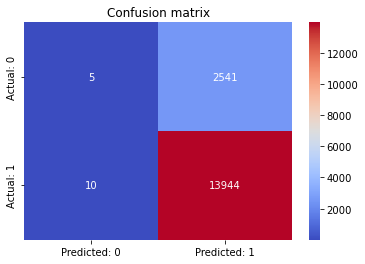

In [10]:
x_axis_labels = ['Predicted: 0','Predicted: 1']
y_axis_labels = ['Actual: 0','Actual: 1']
sns.heatmap(confusion_matrix(Y_Test,Y_pred), annot=True,fmt="d",cmap='coolwarm', xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.title('Confusion matrix')
plt.show()

In [11]:
#Getting TP,TN,FP,FN values from confusion matrix
C_Matrix=confusion_matrix(Y_Test,Y_pred)
def TPTN(conf):
    TN = conf[0,0]
    FP = conf[0,1]
    FN = conf[1,0]
    TP = conf[1,1]
    return TN,FP,FN,TP
TN,FP,FN,TP=TPTN(C_Matrix)

In [12]:
LAccuracy,LPrecision,LF1Score,LRecall,LTrueSkillStatistic,LHeidkeSkillScore,LBalancedAccuracy,LYoudenIndex=[],[],[],[],[],[],[],[]
ta={1:0.728693,4:0.728692,2:0.728686,6:0.728678,9:0.728616,7:0.727908,8:0.727122,5:0.720862,3:0.616463,0:0.531713}
train_auc_=pd.Series(ta)
a={1:-5.00000,4:-4.00000,2:-3.30103,6:-3.00000,9:-2.30103,7:-1.30103,8:-1.00000,5:-0.30103,3:1.00000,0:2.00000}
alpha_=pd.Series(a)
Models=['GaussianNB',' Logistic Regression','RandomForest','AdaBoost','KNeighbors']
cv={1:0.662078,4:0.662077,2:0.662073,6:0.662067,9:0.662021,7:0.661533,8:0.661014,5:0.656868,3:0.581507,0:0.525193}
cv_auc_=pd.Series(cv)

### Evaluation metrics which are not implemented in standard libraries.

In [13]:
def Accuracy(C_Matrix):
    TN,FP,FN,TP=TPTN(C_Matrix)
    return (TP+TN)/(TP+TN+FP+FN)

def Precision(C_Matrix):
    TN,FP,FN,TP=TPTN(C_Matrix)
    return TP/(TP+FP)

def Recall(C_Matrix):
    TN,FP,FN,TP=TPTN(C_Matrix)
    return TP/(TP+FN)

def F1Score(C_Matrix):
    TN,FP,FN,TP=TPTN(C_Matrix)
    a=Precision(C_Matrix)*Recall(C_Matrix)
    b=Precision(C_Matrix)+Recall(C_Matrix)
    return 2*a/b
def TrueSkillStatistic(C_Matrix):
    TN,FP,FN,TP=TPTN(C_Matrix)
    return(TP/(TP+FN))-(FP/(TN+FP))
    
def HeidkeSkillScore(C_Matrix):
    TN,FP,FN,TP=TPTN(C_Matrix)
    a=2*((TP*TN)-(FN*FP))
    b=((TP+FN)*(FN+TN)) + ((FP+TN)*(TP+FP))
    return a/b
def BalancedAccuracy(C_Matrix):
    TN,FP,FN,TP=TPTN(C_Matrix)
    a=TP+TN
    b=TP+FP+TN+FN
    return (a/(2*b))
def YoudenIndex(C_Matrix):
    TN,FP,FN,TP=TPTN(C_Matrix)
    a=(TP*TN-FN*FP)
    b=(TP+FN)*(FP+TN)
    return a/b
    
LAccuracy.append(Accuracy(C_Matrix))
LPrecision.append(Precision(C_Matrix))
LF1Score.append(F1Score(C_Matrix))
LRecall.append(Recall(C_Matrix))
LTrueSkillStatistic.append(TrueSkillStatistic(C_Matrix))
LHeidkeSkillScore.append(HeidkeSkillScore(C_Matrix))
LBalancedAccuracy.append(BalancedAccuracy(C_Matrix))
LYoudenIndex.append(YoudenIndex(C_Matrix))

### Checking Obtained Metric Values with standard library values

In [14]:
 print(classification_report(Y_Test, Y_pred, labels=[1, 2, 3]))

              precision    recall  f1-score   support

           1       0.85      1.00      0.92     13954
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0

   micro avg       0.85      1.00      0.92     13954
   macro avg       0.28      0.33      0.31     13954
weighted avg       0.85      1.00      0.92     13954



#### Hyperparameter tuning

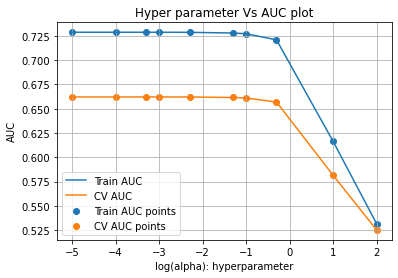

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.029339,0.003770,0.016003,0.000004,0.00001,{'alpha': 1e-05},0.554363,0.577224,0.56869,0.566759,0.009432,1,0.575574,0.563462,0.567795,0.568944,0.005011
2,0.029341,0.003772,0.013333,0.003776,0.0001,{'alpha': 0.0001},0.554363,0.577224,0.56869,0.566759,0.009432,1,0.575574,0.563462,0.567795,0.568944,0.005011
1,0.034671,0.003766,0.010672,0.003776,0.0005,{'alpha': 0.0005},0.554363,0.577224,0.56869,0.566759,0.009432,1,0.575574,0.563462,0.567795,0.568944,0.005011
4,0.030000,0.003887,0.013655,0.003336,0.001,{'alpha': 0.001},0.554363,0.577224,0.56869,0.566759,0.009432,1,0.575574,0.563462,0.567795,0.568944,0.005011
3,0.032007,0.000002,0.013333,0.003771,0.005,{'alpha': 0.005},0.554363,0.577224,0.56869,0.566759,0.009432,1,0.575574,0.563462,0.567795,0.568944,0.005011


In [15]:
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.naive_bayes import MultinomialNB
import math

model = MultinomialNB(fit_prior=False, class_prior=[0.5,0.5])
parameters = {'alpha': [0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]}
clf = GridSearchCV(model, parameters, cv=3, scoring='roc_auc', n_jobs=-1,return_train_score=True)
clf.fit(X_Train, Y_Train)

results = pd.DataFrame.from_dict(clf.cv_results_)
results = results.sort_values(['param_alpha'])

train_auc= results['mean_train_score']
cv_auc = results['mean_test_score'] 
alpha =  np.log10(results['param_alpha'].astype('float64'))

plt.plot(alpha_, train_auc_, label='Train AUC')
plt.plot(alpha_, cv_auc_, label='CV AUC')

plt.scatter(alpha_, train_auc_, label='Train AUC points')
plt.scatter(alpha_, cv_auc_, label='CV AUC points')


plt.legend()
plt.xlabel("log(alpha): hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()

results.head()

### Train a model using Logistic Regression algorithm

In [16]:
from sklearn.metrics import roc_curve, auc
lor= LogisticRegression(random_state=None,solver='lbfgs', max_iter=1000)
#Training and Fitting model using Naive Bayes algorithm with trained data
lor.fit(X_Train,Y_Train)
#predicting the y values for all X values of testing data set
Y_pred = pd.DataFrame(lor.predict(X_Test),columns=["Passed"]) 

In [17]:
accuracy = accuracy_score(Y_Test, Y_pred) 
print("accuracy score of the given prediction values of y with testing values of y",accuracy)

accuracy score of the given prediction values of y with testing values of y 0.8453333333333334


#### ROC_AUC_Curve

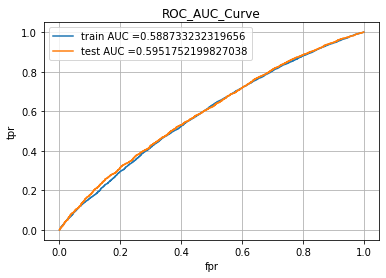

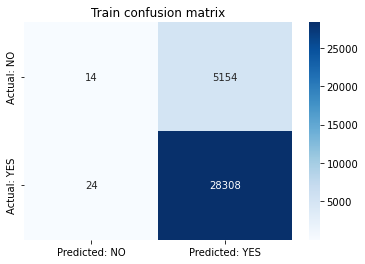

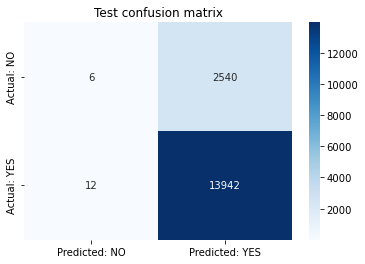

In [18]:
y_train_pred = lor.predict_proba(X_Train)[:,1]   
y_test_pred =  lor.predict_proba(X_Test)[:,1] 
train_fpr, train_tpr, tr_thresholds = roc_curve(Y_Train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(Y_Test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("ROC_AUC_Curve")
plt.grid()
plt.show()

x_axis_labels = ['Predicted: NO','Predicted: YES']
y_axis_labels = ['Actual: NO','Actual: YES']
sns.heatmap(confusion_matrix(Y_Train, lor.predict(X_Train)), annot=True,fmt="d",cmap='Blues', xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.title('Train confusion matrix')
plt.show()
sns.heatmap(confusion_matrix(Y_Test,lor.predict(X_Test)), annot=True,fmt="d",cmap='Blues', xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.title('Test confusion matrix')
plt.show()

### HyperParameter tuning For Logistic regression

In [19]:
parameters = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}

logreg = LogisticRegression()
clf = GridSearchCV(logreg,                   
                   param_grid = parameters,   
                   scoring='accuracy',        
                   cv=10)
clf.fit(X_Train,Y_Train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

#### Accuracy after Hyperparameter tuning

In [20]:
print("Tuned Hyperparameters :", clf.best_params_)
print("Accuracy after hyperparameter tuning :",clf.best_score_)

Tuned Hyperparameters : {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy after hyperparameter tuning : 0.8457611940298507


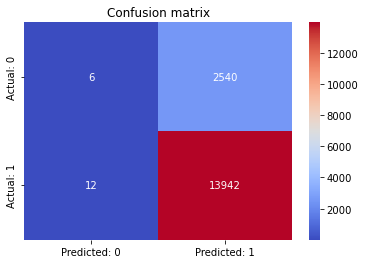

In [21]:
x_axis_labels = ['Predicted: 0','Predicted: 1']
y_axis_labels = ['Actual: 0','Actual: 1']
sns.heatmap(confusion_matrix(Y_Test,Y_pred), annot=True,fmt="d",cmap='coolwarm', xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.title('Confusion matrix')
plt.show()

In [22]:
C_Matrix=confusion_matrix(Y_Test,Y_pred)
LAccuracy.append(Accuracy(C_Matrix))
LPrecision.append(Precision(C_Matrix))
LF1Score.append(F1Score(C_Matrix))
LRecall.append(Recall(C_Matrix))
LTrueSkillStatistic.append(TrueSkillStatistic(C_Matrix))
LHeidkeSkillScore.append(HeidkeSkillScore(C_Matrix))
LBalancedAccuracy.append(BalancedAccuracy(C_Matrix))
LYoudenIndex.append(YoudenIndex(C_Matrix))

### Train a model using RandomForestClassifier

In [23]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100) 
 
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_Train, Y_Train)
 
# performing predictions on the test dataset
y_pred = clf.predict(X_Test)
 
# metrics are used to find accuracy or error
from sklearn import metrics 
print()
 
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(Y_Test, Y_pred))


ACCURACY OF THE MODEL:  0.8453333333333334


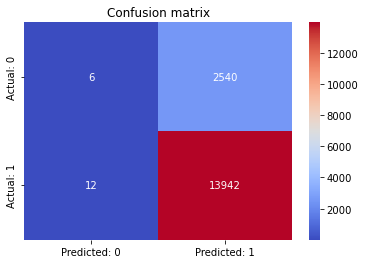

In [24]:
x_axis_labels = ['Predicted: 0','Predicted: 1']
y_axis_labels = ['Actual: 0','Actual: 1']
sns.heatmap(confusion_matrix(Y_Test,Y_pred), annot=True,fmt="d",cmap='coolwarm', xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.title('Confusion matrix')
plt.show()

In [25]:
C_Matrix=confusion_matrix(Y_Test,Y_pred)
LAccuracy.append(Accuracy(C_Matrix))
LPrecision.append(Precision(C_Matrix))
LF1Score.append(F1Score(C_Matrix))
LRecall.append(Recall(C_Matrix))
LTrueSkillStatistic.append(TrueSkillStatistic(C_Matrix))
LHeidkeSkillScore.append(HeidkeSkillScore(C_Matrix))
LBalancedAccuracy.append(BalancedAccuracy(C_Matrix))
LYoudenIndex.append(YoudenIndex(C_Matrix))

### Train a model using AdaBoostClassifier

In [26]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(X_Train, Y_Train)

#Predict the response for test dataset
Y_Pred = model.predict(X_Test)
accuracy = accuracy_score(Y_Test, Y_pred)
print('Accuracy of our model is equal ',accuracy)

Accuracy of our model is equal  0.8453333333333334


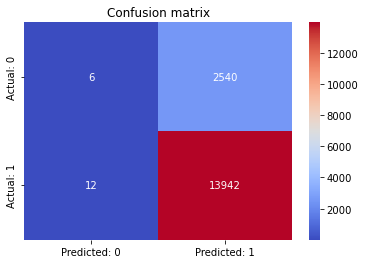

In [27]:
x_axis_labels = ['Predicted: 0','Predicted: 1']
y_axis_labels = ['Actual: 0','Actual: 1']
sns.heatmap(confusion_matrix(Y_Test,Y_pred), annot=True,fmt="d",cmap='coolwarm', xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.title('Confusion matrix')
plt.show()

In [28]:
C_Matrix=confusion_matrix(Y_Test,Y_pred)
LAccuracy.append(Accuracy(C_Matrix))
LPrecision.append(Precision(C_Matrix))
LF1Score.append(F1Score(C_Matrix))
LRecall.append(Recall(C_Matrix))
LTrueSkillStatistic.append(TrueSkillStatistic(C_Matrix))
LHeidkeSkillScore.append(HeidkeSkillScore(C_Matrix))
LBalancedAccuracy.append(BalancedAccuracy(C_Matrix))
LYoudenIndex.append(YoudenIndex(C_Matrix))

### Train a model using KNeighborsClassifier

In [29]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier(n_neighbors=3)
KNN_model
KNN_model.fit(X_Train, Y_Train)
Y_pred = KNN_model.predict(X_Test)
accuracy = accuracy_score(Y_Test, Y_pred)
print('Accuracy of our model is equal ',accuracy)

Accuracy of our model is equal  0.8018181818181818


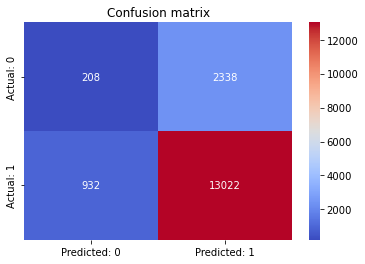

In [30]:
x_axis_labels = ['Predicted: 0','Predicted: 1']
y_axis_labels = ['Actual: 0','Actual: 1']
sns.heatmap(confusion_matrix(Y_Test,Y_pred), annot=True,fmt="d",cmap='coolwarm', xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.title('Confusion matrix')
plt.show()

In [31]:
C_Matrix=confusion_matrix(Y_Test,Y_pred)
LAccuracy.append(Accuracy(C_Matrix))
LPrecision.append(Precision(C_Matrix))
LF1Score.append(F1Score(C_Matrix))
LRecall.append(Recall(C_Matrix))
LTrueSkillStatistic.append(TrueSkillStatistic(C_Matrix))
LHeidkeSkillScore.append(HeidkeSkillScore(C_Matrix))
LBalancedAccuracy.append(BalancedAccuracy(C_Matrix))
LYoudenIndex.append(YoudenIndex(C_Matrix))

In [32]:
zipped = list(zip(LAccuracy,LPrecision,LF1Score,LRecall,LTrueSkillStatistic,LHeidkeSkillScore,LBalancedAccuracy,LYoudenIndex))


In [33]:
Comparison=pd.DataFrame(zipped, columns=['Accuracy','Precision','F1Score','Recall','TrueSkillStatistic','HeidkeSkillScore','BalancedAccuracy','YoudenIndex'],index=['GaussianNB',' Logistic Regression','RandomForest','AdaBoost','KNeighbors'])

In [34]:
#df with all evaluation metrics for every model
Comparison

,Accuracy,Precision,F1Score,Recall,TrueSkillStatistic,HeidkeSkillScore,BalancedAccuracy,YoudenIndex
GaussianNB,0.845394,0.845860,0.916193,0.999283,0.001247,0.002101,0.422697,0.001247
Logistic Regression,0.845333,0.845892,0.916152,0.999140,0.001497,0.002519,0.422667,0.001497
RandomForest,0.845333,0.845892,0.916152,0.999140,0.001497,0.002519,0.422667,0.001497
AdaBoost,0.845333,0.845892,0.916152,0.999140,0.001497,0.002519,0.422667,0.001497
KNeighbors,0.801818,0.847786,0.888449,0.933209,0.014906,0.019252,0.400909,0.014906


### Visualising and Comparing Evaluation Metric Values for Every Model

<AxesSubplot:>

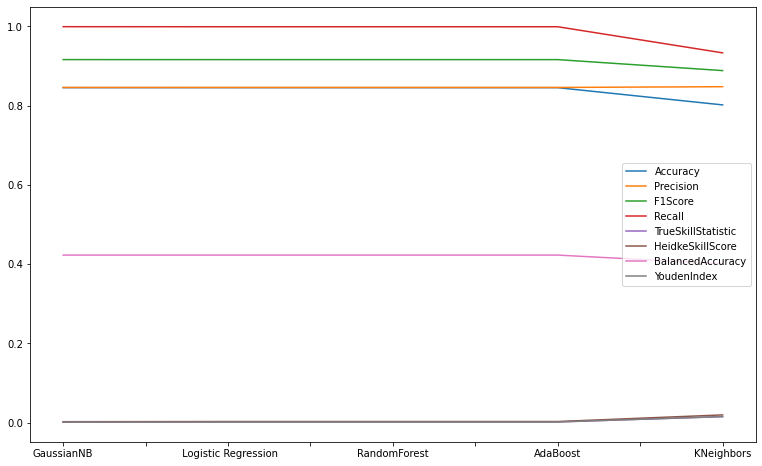

In [35]:
Comparison.plot.line(figsize=(13,8))

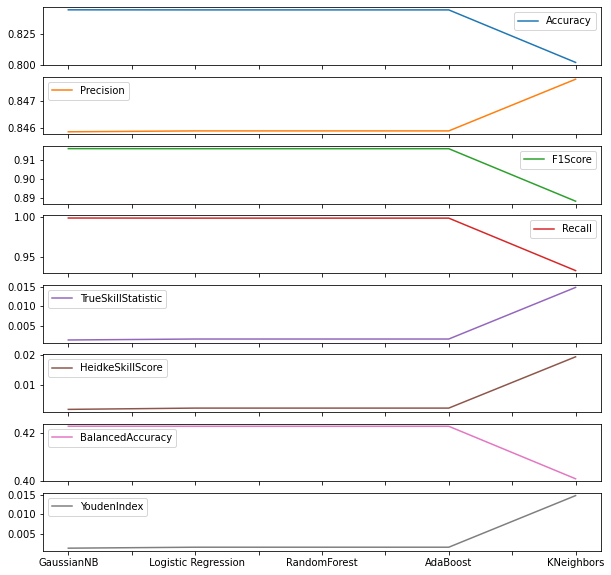

In [36]:
axes = Comparison.plot.line(subplots=True,figsize=(10,10))

<AxesSubplot:xlabel='index'>

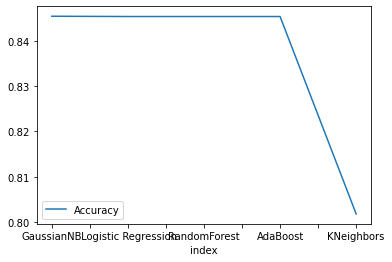

In [37]:
Comparison.reset_index().plot.line(x='index', y='Accuracy')

<AxesSubplot:xlabel='index'>

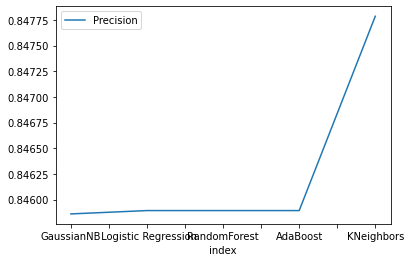

In [38]:
Comparison.reset_index().plot.line(x='index', y='Precision')

<AxesSubplot:xlabel='index'>

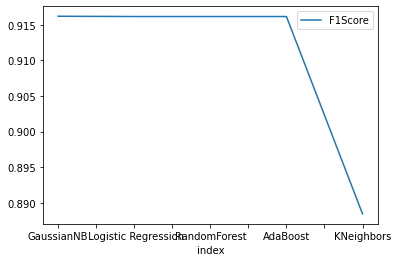

In [39]:
Comparison.reset_index().plot.line(x='index', y='F1Score')

<AxesSubplot:xlabel='index'>

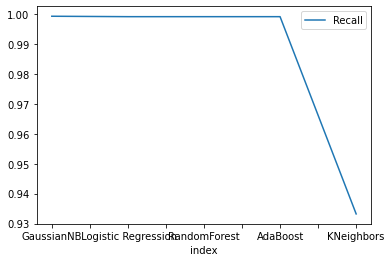

In [40]:
Comparison.reset_index().plot.line(x='index', y='Recall')

<AxesSubplot:xlabel='index'>

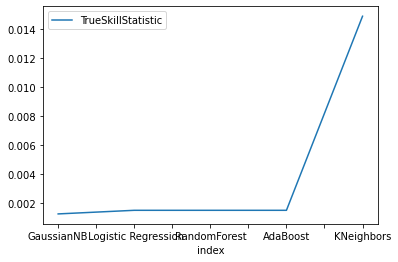

In [41]:
Comparison.reset_index().plot.line(x='index', y='TrueSkillStatistic')

<AxesSubplot:xlabel='index'>

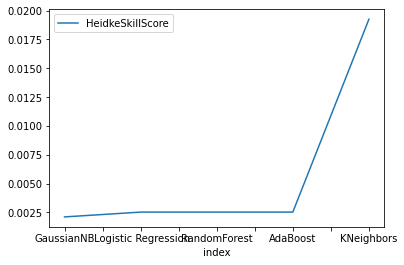

In [42]:
Comparison.reset_index().plot.line(x='index', y='HeidkeSkillScore')

<AxesSubplot:xlabel='index'>

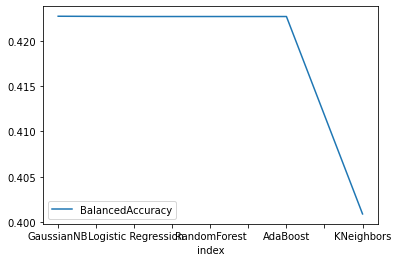

In [43]:
Comparison.reset_index().plot.line(x='index', y='BalancedAccuracy')

<AxesSubplot:xlabel='index'>

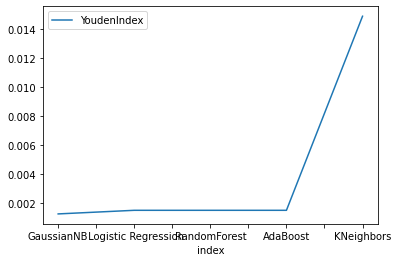

In [44]:
Comparison.reset_index().plot.line(x='index', y='YoudenIndex')